In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline
import hddm
import kabuki
import arviz as az

print("The current version of kabuki is: ", kabuki.__version__)
print("The current version of HDDM is: ", hddm.__version__)
print("The current version of arviz is: ", az.__version__)

The current version of kabuki is:  0.6.5RC3
The current version of HDDM is:  0.8.0
The current version of arviz is:  0.15.1


# Load data

In [3]:
data = hddm.load_csv('/opt/conda/lib/python3.8/site-packages/hddm/examples/cavanagh_theta_nn.csv')

In [4]:
data.head(10)

,subj_idx,stim,rt,response,theta,dbs,conf
0,0,LL,1.210,1.0,0.656275,1,HC
1,0,WL,1.630,1.0,-0.327889,1,LC
2,0,WW,1.030,1.0,-0.480285,1,HC
3,0,WL,2.770,1.0,1.927427,1,LC
4,0,WW,1.140,0.0,-0.213236,1,HC
5,0,WL,1.150,1.0,-0.436204,1,LC
6,0,LL,2.000,1.0,-0.274479,1,HC
7,0,WL,1.040,0.0,0.666957,1,LC
8,0,WW,0.857,1.0,0.118617,1,HC
9,0,WL,1.500,0.0,0.823626,1,LC


In [5]:
import numpy as np
np.unique(data.subj_idx)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13])

`subj_idx`: Subject ID, 14 subjects with index starting from 0  
`stim`: Condition based on pairs of stimuli. Win-win (WW), lose-lose (LL), win-lose (WL)  
`rt`: Response time in seconds  
`reponse`: Accuracy coded (1 = correct, more rewarding stimulus selected).  
`theta`: Theta band EEG activity.  
`dbs`: Deep brain simulation on/off.  
`conf`: Conflict condition. WL is easiest and low conflict (LC); the other two conditions are high conflict (HC).  

Response times for all subjects

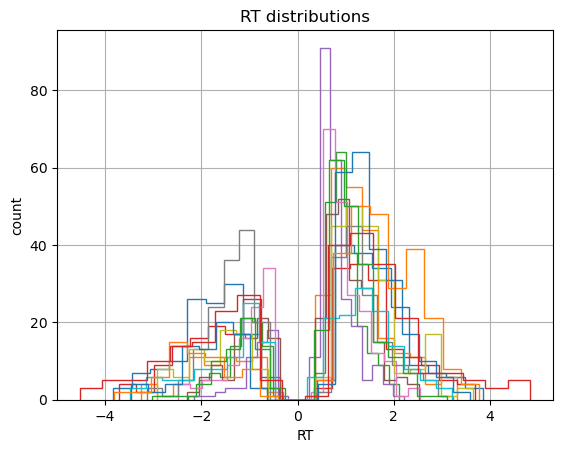

In [6]:
data = hddm.utils.flip_errors(data)

fig = plt.figure()
ax = fig.add_subplot(111, xlabel='RT', ylabel='count', title='RT distributions')
for i, subj_data in data.groupby('subj_idx'):
    subj_data.rt.hist(bins=20, histtype='step', ax=ax)

# Fit a hierarchical model

In [7]:
%%time
# Instantiate model object passing it our data (no need to call flip_errors() before passing it).

# This will tailor an individual hierarchical DDM around your dataset.
m = hddm.HDDM(data, include = ['v', 'a', 't', 'z'],
                        informative = True,
                        is_group_model = True)
# find a good starting point which helps with the convergence.
m.find_starting_values()
# start drawing 2000 samples and discarding 20 as burn-in (usually you want to have a longer burn-in period)
m.sample(2000, burn=20)

/opt/conda/lib/python3.8/site-packages/scipy/optimize/_optimize.py:2309: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)


 [-----------------100%-----------------] 2000 of 2000 complete in 90.8 sechddm sampling elpased time:  90.818 s
CPU times: user 1min 31s, sys: 358 ms, total: 1min 32s
Wall time: 1min 31s


In [8]:
stats = m.gen_stats()
stats[stats.index.isin(['a', 'a_std', 'a_subj.0', 'a_subj.1'])]

,mean,std,2.5q,25q,50q,75q,97.5q,mc err
a,1.975625,0.095224,1.79943,1.915554,1.970631,2.031938,2.176302,0.002775
a_std,0.341601,0.086014,0.224898,0.284814,0.326962,0.383756,0.536247,0.002935
a_subj.0,2.201854,0.06514,2.070713,2.157922,2.201449,2.247413,2.330443,0.001995
a_subj.1,2.111853,0.065222,1.992551,2.066802,2.109326,2.154481,2.247525,0.002159


Plotting a
Plotting a_std
Plotting v
Plotting t


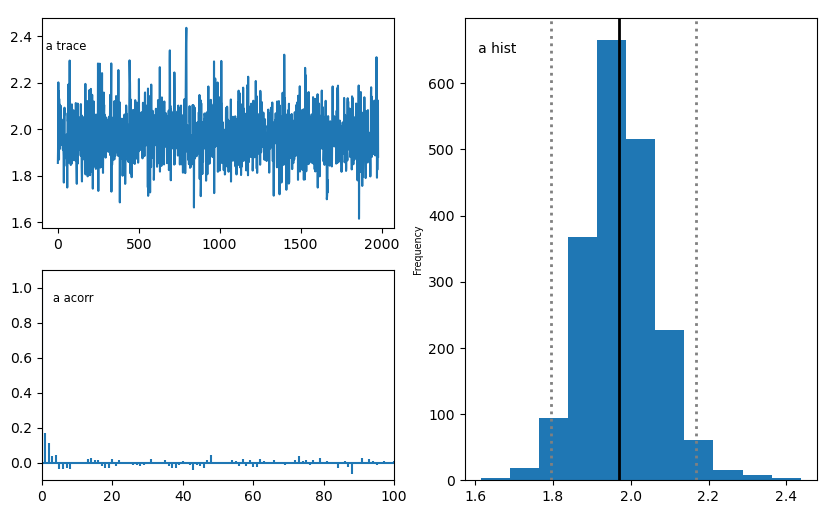

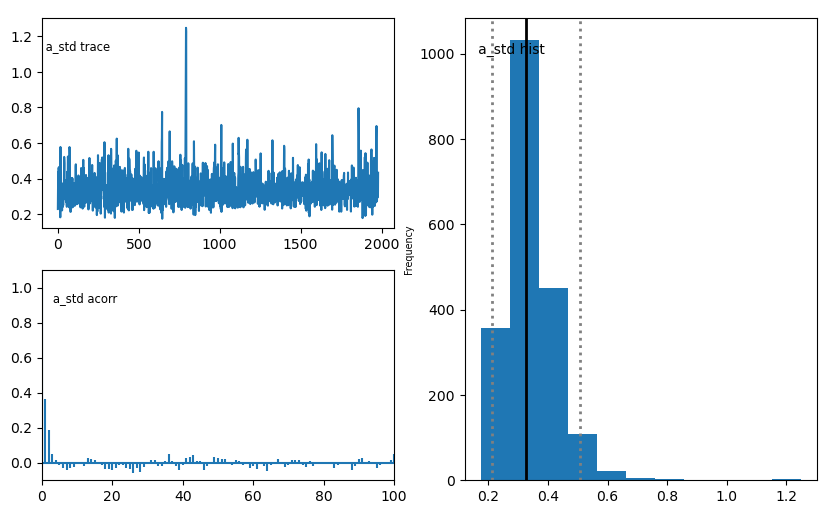

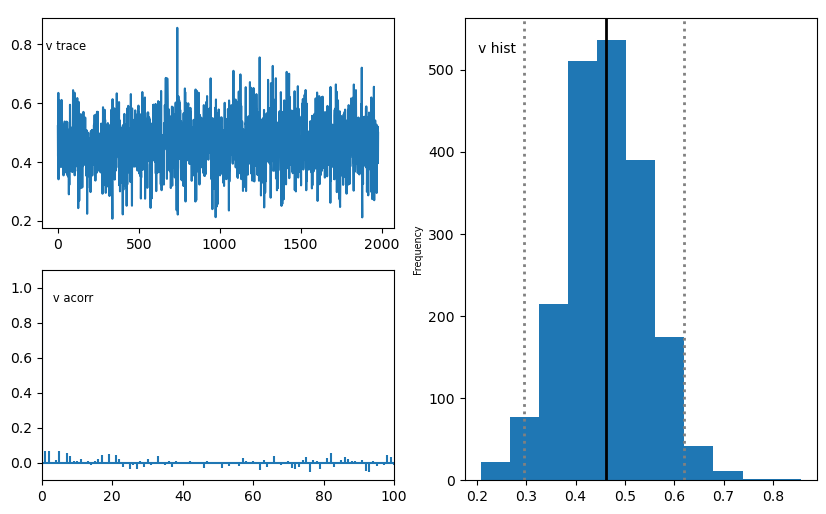

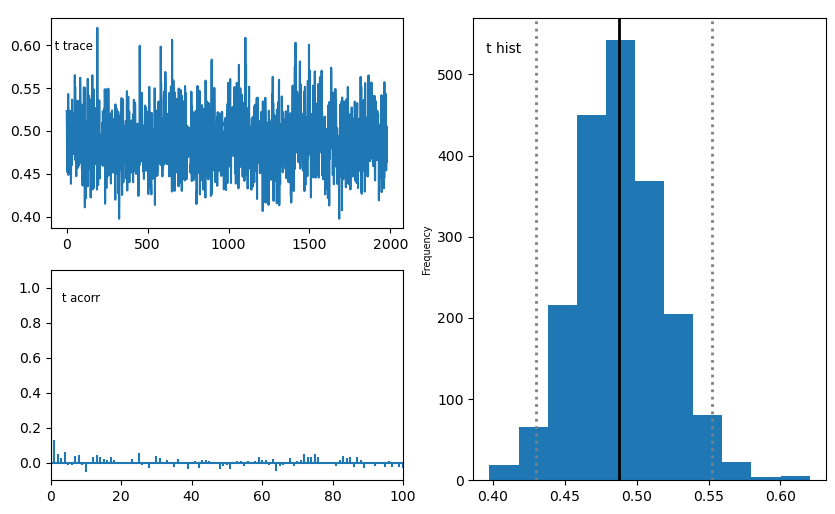

In [9]:
m.plot_posteriors(['a', 't', 'v', 'a_std'])

In [10]:
%%time
models = []
for i in range(5):
    m = hddm.HDDM(data, include = ['v', 'a', 't', 'z'],
                        informative = True,
                        is_group_model = True)
    m.find_starting_values()
    m.sample(2000, burn=500)
    models.append(m)

rhats = hddm.analyze.gelman_rubin(models)
rhats = pd.DataFrame.from_dict(rhats, orient='index', columns=['R_hat']).sort_values('R_hat', ascending=False)
rhats.head(20)

# The below code use the new argument `chains` and it is more faster than the origin code above. 
# import arviz as az
# models = hddm.HDDM(
#     data, 
#     include = ['v', 'a', 't', 'z'],
#     informative = True,
#     is_group_model = True
# )
# models.find_starting_values()
# infData = models.sample(2000, chains = 500, InfData = True)
# az.summary(infData, kind = 'diagnostics')

/opt/conda/lib/python3.8/site-packages/scipy/optimize/_optimize.py:2309: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)


 [-----------------100%-----------------] 2000 of 2000 complete in 90.1 sechddm sampling elpased time:  90.116 s


/opt/conda/lib/python3.8/site-packages/scipy/optimize/_optimize.py:2309: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)


 [-----------------100%-----------------] 2000 of 2000 complete in 91.4 sechddm sampling elpased time:  91.468 s


/opt/conda/lib/python3.8/site-packages/scipy/optimize/_optimize.py:2309: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)


 [-----------------100%-----------------] 2000 of 2000 complete in 90.6 sechddm sampling elpased time:  90.673 s


/opt/conda/lib/python3.8/site-packages/scipy/optimize/_optimize.py:2309: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)


 [-----------------100%-----------------] 2000 of 2000 complete in 89.4 sechddm sampling elpased time:  89.459 s


/opt/conda/lib/python3.8/site-packages/scipy/optimize/_optimize.py:2309: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)


 [-----------------100%-----------------] 2000 of 2000 complete in 89.6 sechddm sampling elpased time:  89.665 s
CPU times: user 7min 36s, sys: 1.87 s, total: 7min 38s
Wall time: 7min 36s


,R_hat
z_std,1.019319
z_subj_trans.10,1.009687
z_subj_trans.3,1.006673
z_subj_trans.13,1.005804
z_subj_trans.6,1.005376
z_trans,1.004987
z_subj_trans.1,1.003696
z_subj_trans.5,1.003385
v_subj.10,1.003061
z_subj_trans.2,1.002657


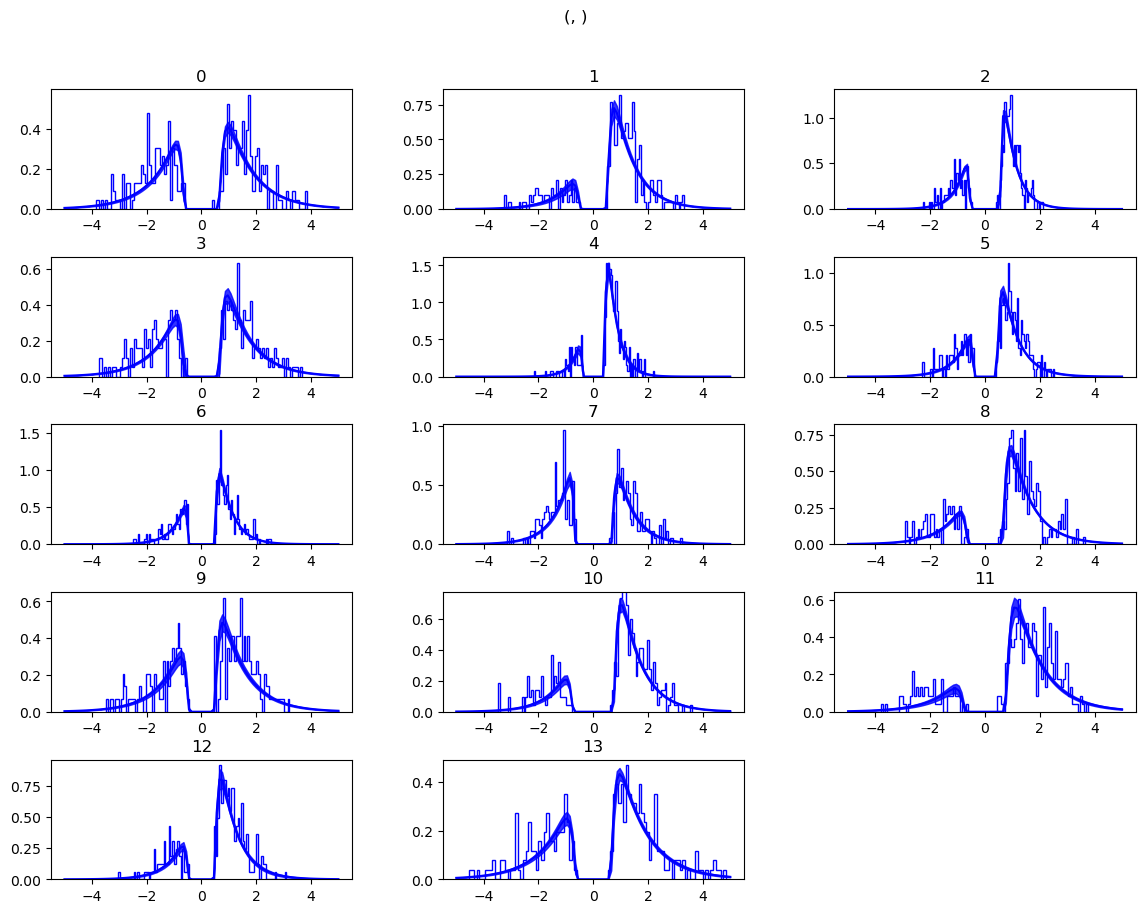

In [11]:
m.plot_posterior_predictive(figsize=(14, 10))

## Condition specific drift rates

In [12]:
%%time
m_stim = hddm.HDDM(data, include = ['v', 'a', 't', 'z'],
                   informative = True,
                   is_group_model = True,
                   depends_on={'v': 'stim'})
m_stim.find_starting_values()
m_stim.sample(2000, burn=100)

/opt/conda/lib/python3.8/site-packages/scipy/optimize/_optimize.py:2309: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)


 [-----------------100%-----------------] 2000 of 2000 complete in 185.8 sechddm sampling elpased time:  185.946 s
CPU times: user 3min 8s, sys: 1.46 s, total: 3min 9s
Wall time: 3min 8s


Text(0.5, 1.0, 'Posterior of drift-rate group means')

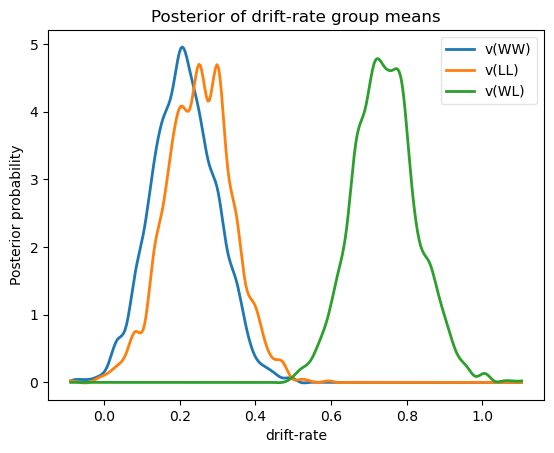

In [13]:
v_WW, v_LL, v_WL = m_stim.nodes_db.node[['v(WW)', 'v(LL)', 'v(WL)']]
hddm.analyze.plot_posterior_nodes([v_WW, v_LL, v_WL])
plt.xlabel('drift-rate')
plt.ylabel('Posterior probability')
plt.title('Posterior of drift-rate group means')

In [14]:
print("P(WW > LL) = ", (v_WW.trace() > v_LL.trace()).mean())
print("P(LL > WL) = ", (v_LL.trace() > v_WL.trace()).mean())

P(WW > LL) =  0.37315789473684213
P(LL > WL) =  0.0


In [15]:
print("Lumped model DIC: %f" % m.dic)
print("Stimulus model DIC: %f" % m_stim.dic)

Lumped model DIC: 10970.119779
Stimulus model DIC: 10780.688503


## Within-subject effects

In [16]:
from patsy import dmatrix
dmatrix("C(stim, Treatment('WL'))", data.head(10))

DesignMatrix with shape (10, 3)
  Intercept  C(stim, Treatment('WL'))[T.LL]  C(stim, Treatment('WL'))[T.WW]
          1                               1                               0
          1                               0                               0
          1                               0                               1
          1                               0                               0
          1                               0                               1
          1                               0                               0
          1                               1                               0
          1                               0                               0
          1                               0                               1
          1                               0                               0
  Terms:
    'Intercept' (column 0)
    "C(stim, Treatment('WL'))" (columns 1:3)

In [17]:
m_within_subj = hddm.HDDMRegressor(data, "v ~ C(stim, Treatment('WL'))", 
                                   include = ['v', 'a', 't', 'z'],
                                   informative = True,
                                   is_group_model = True)

Adding these covariates:
['v_Intercept', "v_C(stim, Treatment('WL'))[T.LL]", "v_C(stim, Treatment('WL'))[T.WW]"]


In [18]:
%%time
m_within_subj.sample(2000, burn=100)

 [-----------------100%-----------------] 2000 of 2000 complete in 497.3 sechddm sampling elpased time:  497.396 s
CPU times: user 8min 17s, sys: 1.9 s, total: 8min 18s
Wall time: 8min 17s


Text(0.5, 1.0, 'Group mean posteriors of within-subject drift-rate effects.')

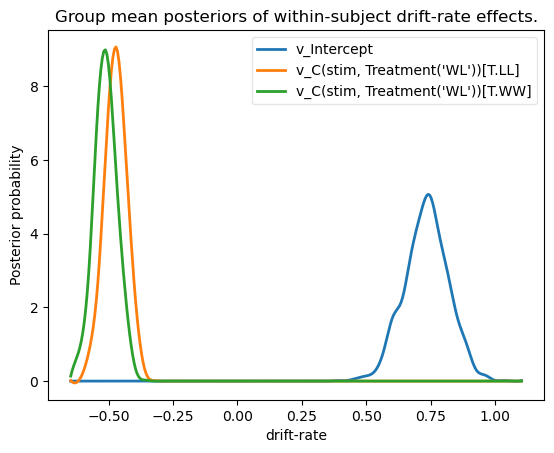

In [19]:
v_WL, v_LL, v_WW = m_within_subj.nodes_db.loc[["v_Intercept",
                                              "v_C(stim, Treatment('WL'))[T.LL]",
                                              "v_C(stim, Treatment('WL'))[T.WW]"], 'node']
hddm.analyze.plot_posterior_nodes([v_WL, v_LL, v_WW])
plt.xlabel('drift-rate')
plt.ylabel('Posterior probability')
plt.title('Group mean posteriors of within-subject drift-rate effects.')

## Fitting regression models

In [20]:
m_reg = hddm.HDDMRegressor(data[data.dbs == 0],
                           "a ~ theta:C(conf, Treatment('LC'))",
                           depends_on={'v': 'stim'},
                           include = ['v', 'a', 't', 'z'],
                           informative = True,
                           is_group_model = True)

Adding these covariates:
['a_Intercept', "a_theta:C(conf, Treatment('LC'))[HC]", "a_theta:C(conf, Treatment('LC'))[LC]"]


In [21]:
%%time
m_reg.sample(2000, burn=100)

 [-----------------100%-----------------] 2000 of 2000 complete in 847.5 sechddm sampling elpased time:  847.64 s
CPU times: user 14min 7s, sys: 6.35 s, total: 14min 13s
Wall time: 14min 7s


In [22]:
m_reg_stats = m_reg.gen_stats()
# pd.set_option('display.max_rows', None)
m_reg_stats.head(20)

,mean,std,2.5q,25q,50q,75q,97.5q,mc err
v(LL),0.261815,0.107894,0.054414,0.188111,0.261055,0.333216,0.479735,0.003415
v(WL),0.794482,0.102925,0.591037,0.721463,0.792052,0.861058,0.992449,0.003251
v(WW),0.246292,0.106061,0.045631,0.176651,0.239351,0.316425,0.471297,0.003085
v_std,0.3361,0.053303,0.243487,0.298087,0.331917,0.368116,0.459607,0.002367
v_subj(LL).0,-0.023917,0.152097,-0.330317,-0.122314,-0.021372,0.074711,0.274228,0.004835
v_subj(LL).1,0.184765,0.157447,-0.118491,0.081154,0.180314,0.287937,0.493913,0.004379
v_subj(LL).2,0.247335,0.1725,-0.089493,0.131375,0.24734,0.363692,0.58765,0.004883
v_subj(LL).3,-0.149214,0.160428,-0.467185,-0.254576,-0.149282,-0.042493,0.173528,0.004674
v_subj(LL).4,0.626271,0.221266,0.193691,0.475649,0.631444,0.774127,1.068361,0.007012
v_subj(LL).5,0.409485,0.159653,0.108393,0.304107,0.405744,0.5197,0.727235,0.004041


P(a_theta < 0) =  0.05473684210526316


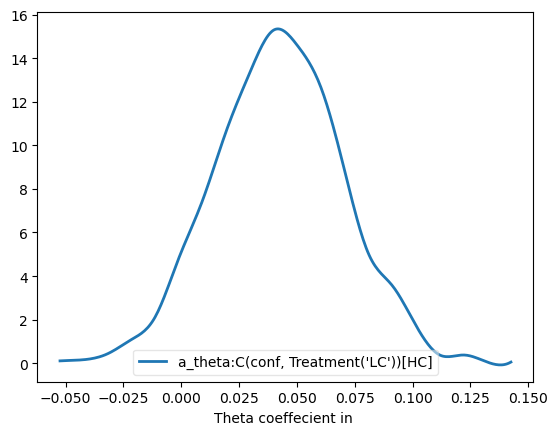

In [23]:
theta = m_reg.nodes_db.node["a_theta:C(conf, Treatment('LC'))[HC]"]
hddm.analyze.plot_posterior_nodes([theta], bins=20)
plt.xlabel('Theta coeffecient in ')
print("P(a_theta < 0) = ", (theta.trace() < 0).mean())

## Dealing with outliers

In [24]:
outlier_data, params = hddm.generate.gen_rand_data(params={'a': 2, 't': .4, 'v': .5},
                                                   size=200, n_fast_outliers=10)

/opt/conda/lib/python3.8/site-packages/hddm/generate.py:683: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers.loc[:, 'rt'].iloc[:n_fast] = np.random.rand(
/opt/conda/lib/python3.8/site-packages/hddm/generate.py:687: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers.loc[:, 'rt'].iloc[n_fast:] = np.random.rand(


In [25]:
%%time
m_no_outlier = hddm.HDDM(outlier_data, p_outlier = 0.0,
                         include = ['v', 'a', 't', 'z'],
                         informative = True,
                         is_group_model = False)
m_no_outlier.sample(2000, burn=50)

 [-----------------100%-----------------] 2000 of 2000 complete in 6.0 sechddm sampling elpased time:  5.989 s
CPU times: user 6.04 s, sys: 188 ms, total: 6.23 s
Wall time: 6.02 s


/opt/conda/lib/python3.8/site-packages/kabuki/analyze.py:543: UserWarning: Too many nodes. Consider increasing number of columns.
  warnings.warn("Too many nodes. Consider increasing number of columns.")


Text(0, 0.5, 'Probability density')

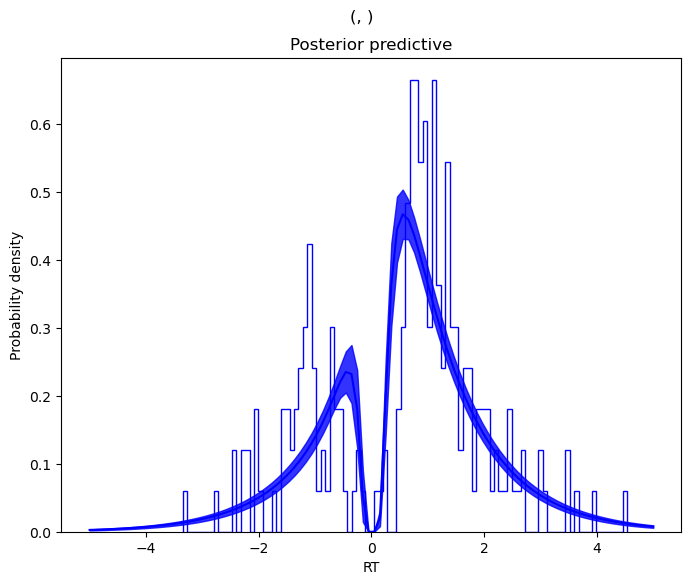

In [26]:
m_no_outlier.plot_posterior_predictive()
plt.title('Posterior predictive')
plt.xlabel('RT')
plt.ylabel('Probability density')

In [27]:
%%time
m_outlier = hddm.HDDM(outlier_data, p_outlier=.05,
                      include = ['v', 'a', 't', 'z'],
                      informative = True,
                      is_group_model = False)
m_outlier.sample(2000, burn=50)

 [-----------------100%-----------------] 2000 of 2000 complete in 6.2 sechddm sampling elpased time:  6.228 s
CPU times: user 6.23 s, sys: 192 ms, total: 6.42 s
Wall time: 6.26 s


/opt/conda/lib/python3.8/site-packages/kabuki/analyze.py:543: UserWarning: Too many nodes. Consider increasing number of columns.
  warnings.warn("Too many nodes. Consider increasing number of columns.")


Text(0, 0.5, 'Probability density')

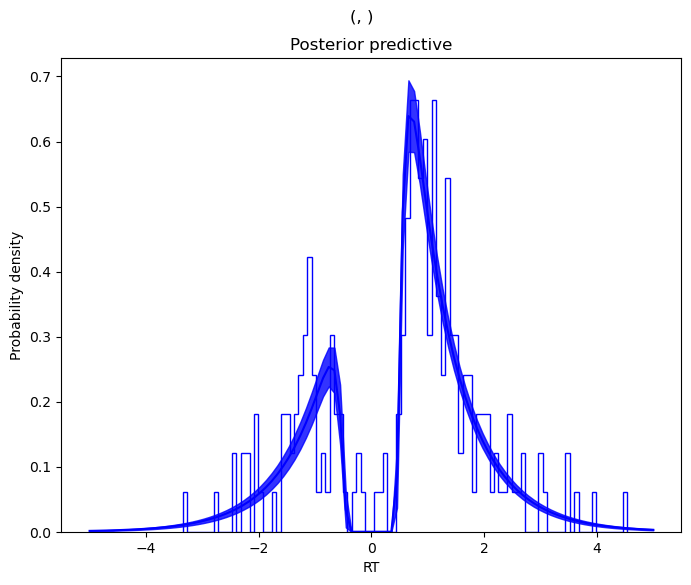

In [28]:
m_outlier.plot_posterior_predictive()
plt.title('Posterior predictive')
plt.xlabel('RT')
plt.ylabel('Probability density')